In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap, ListedColormap
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=200, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)


data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=['x1', 'x2', 'y'])

In [3]:
data

,x1,x2,y
0,1.689767,-1.408241,1.0
1,1.530287,-1.459848,1.0
2,-1.175042,-1.447633,0.0
3,-2.585395,0.963532,0.0
4,1.372246,0.440695,1.0
...,...,...,...
195,-0.435396,0.715716,0.0
196,1.040417,1.108613,1.0
197,1.883798,0.782433,0.0
198,1.829367,1.542978,1.0


__Задание 1.__

Обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделяющую поверхность на трейне (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились? (2б)

In [4]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Your code is here

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

predict_train = decision_tree.predict(X_train)
predict_test = decision_tree.predict(X_test)

print(f'Accuracy score train: {accuracy_score(y_train, predict_train)}')
print(f'Accuracy score test: {accuracy_score(y_test, predict_test)}') 

Accuracy score train: 1.0
Accuracy score test: 0.8


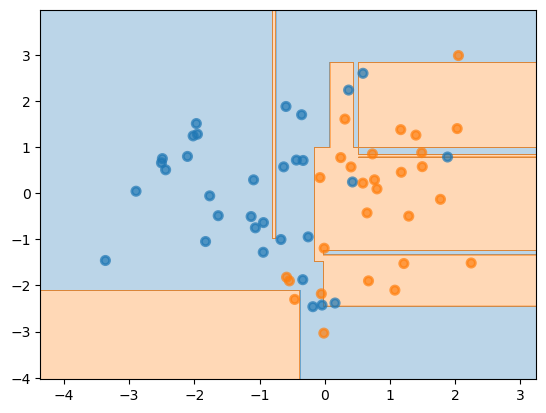

In [7]:
plot_surface(decision_tree, X_test, y_test)

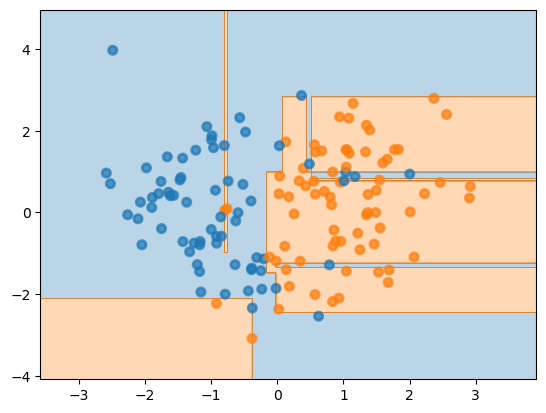

In [8]:
plot_surface(decision_tree, X_train, y_train)

__Задание 2.__

Переберите несколько параметров для регуляризации (`max_depth`, `min_samples_leaf`) из предложенных. Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Используйте, если хотите, функцию ниже. Как изменение параметров влияет на поверхность? При каких параметрах на тесте достигается лучшее качество? А на трейне? (2б).

In [9]:
def plot_surface_axes(clf, X, y, ax, train_acc, test_acc):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
    edgecolors=np.array(palette)[y], linewidths=2)
    
    ax.plot([], [], label = 'train_acc : %0.5f' % train_acc)
    ax.plot([], [], label = 'test_acc : %0.5f' % test_acc)

    ax.legend(loc='lower right', prop={'size': 12})

In [10]:
max_depth_set = [6, 7, 8, 9, 12]

min_samples_leaf_set = [3, 5, 7, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 42) 

max depth = 6, min samples leaf = 3, accuracy train = 0.94375, accuracy test = 0.8
max depth = 6, min samples leaf = 5, accuracy train = 0.925, accuracy test = 0.8
max depth = 6, min samples leaf = 7, accuracy train = 0.9125, accuracy test = 0.8
max depth = 6, min samples leaf = 10, accuracy train = 0.9, accuracy test = 0.8
max depth = 7, min samples leaf = 3, accuracy train = 0.94375, accuracy test = 0.8
max depth = 7, min samples leaf = 5, accuracy train = 0.925, accuracy test = 0.8
max depth = 7, min samples leaf = 7, accuracy train = 0.9125, accuracy test = 0.8
max depth = 7, min samples leaf = 10, accuracy train = 0.9, accuracy test = 0.8
max depth = 8, min samples leaf = 3, accuracy train = 0.94375, accuracy test = 0.8
max depth = 8, min samples leaf = 5, accuracy train = 0.925, accuracy test = 0.8
max depth = 8, min samples leaf = 7, accuracy train = 0.9125, accuracy test = 0.8
max depth = 8, min samples leaf = 10, accuracy train = 0.9, accuracy test = 0.8
max depth = 9, min sam

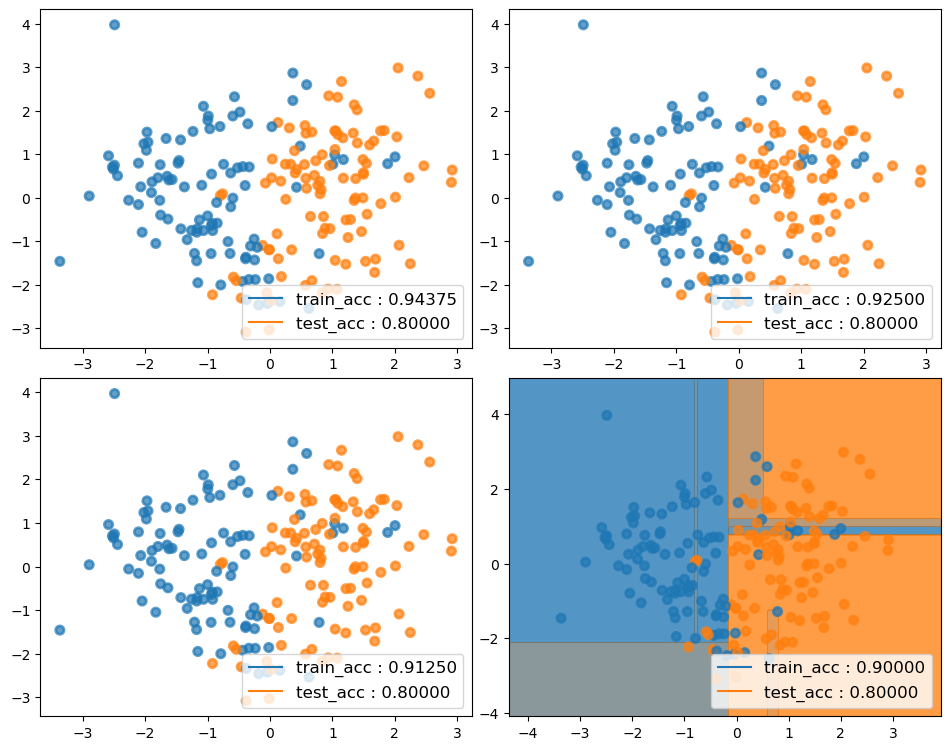

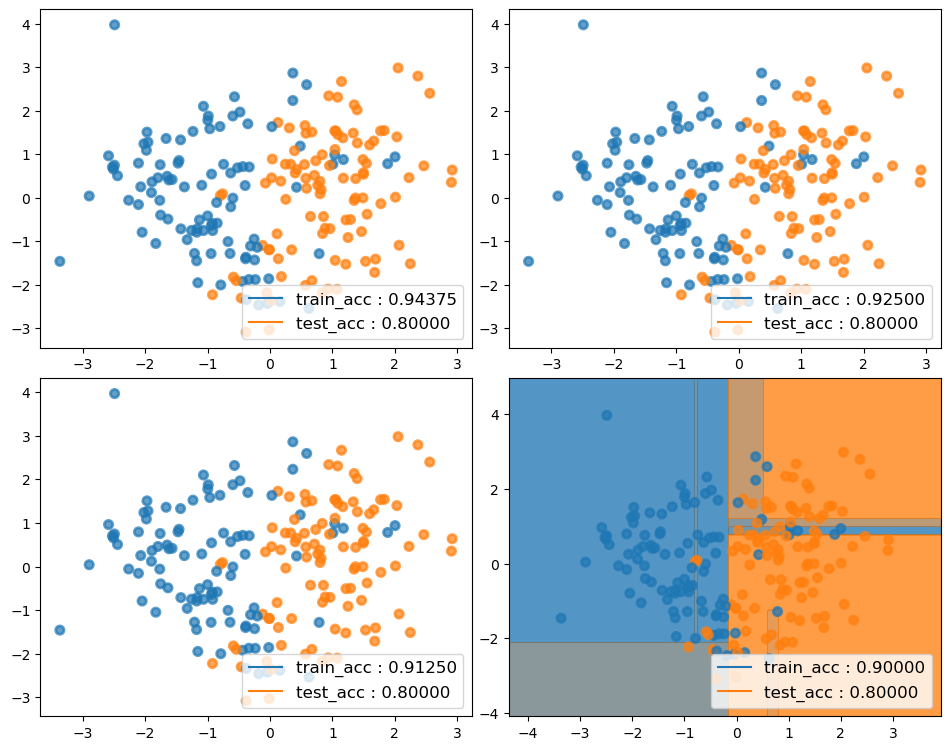

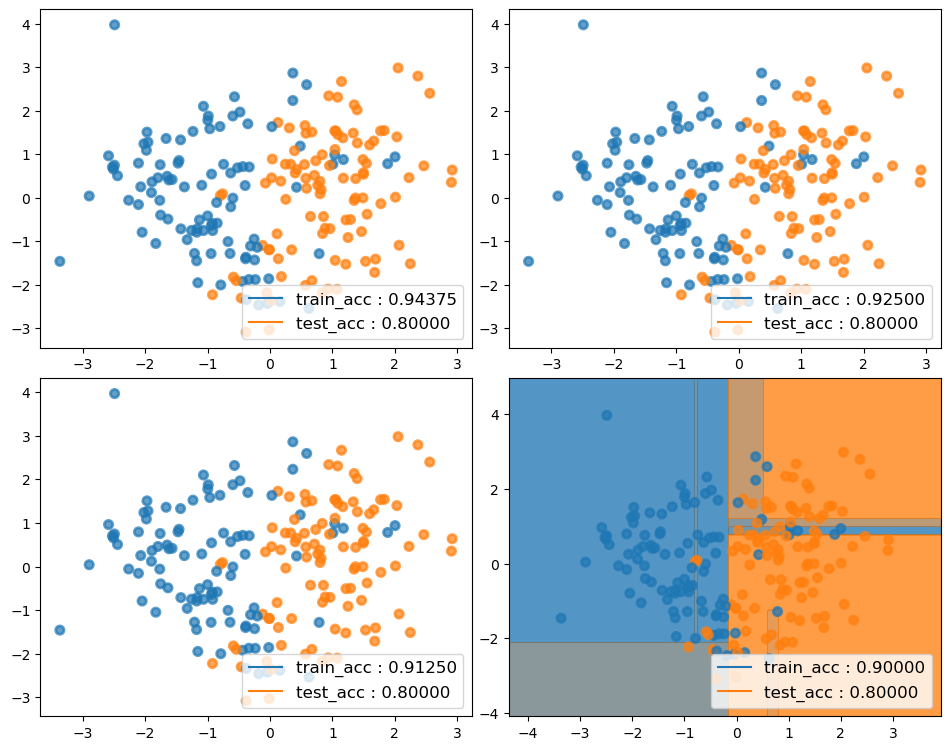

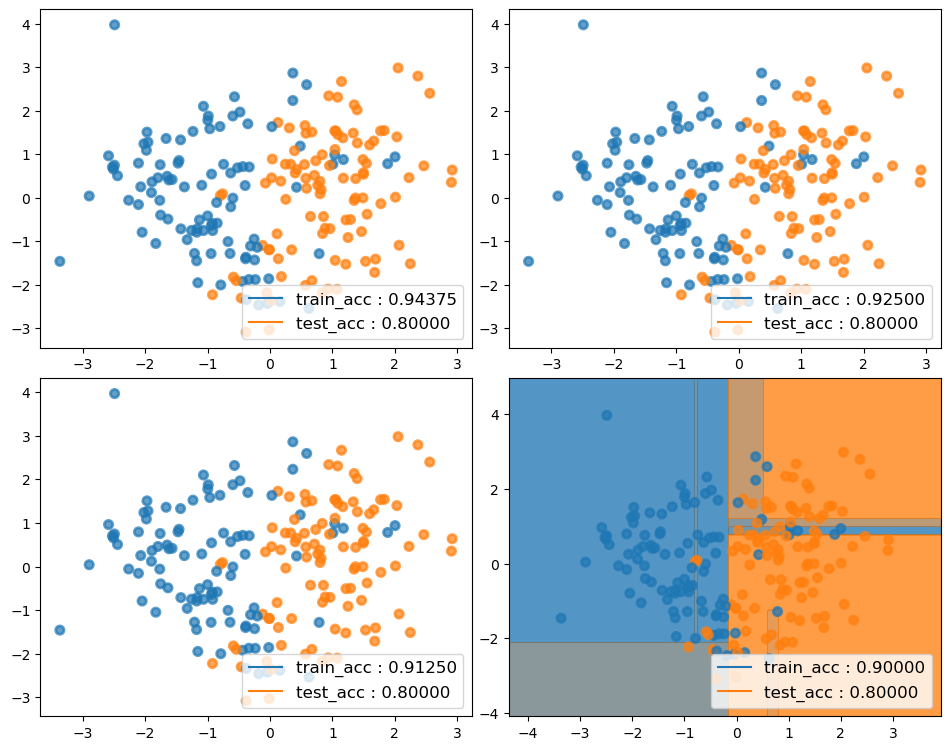

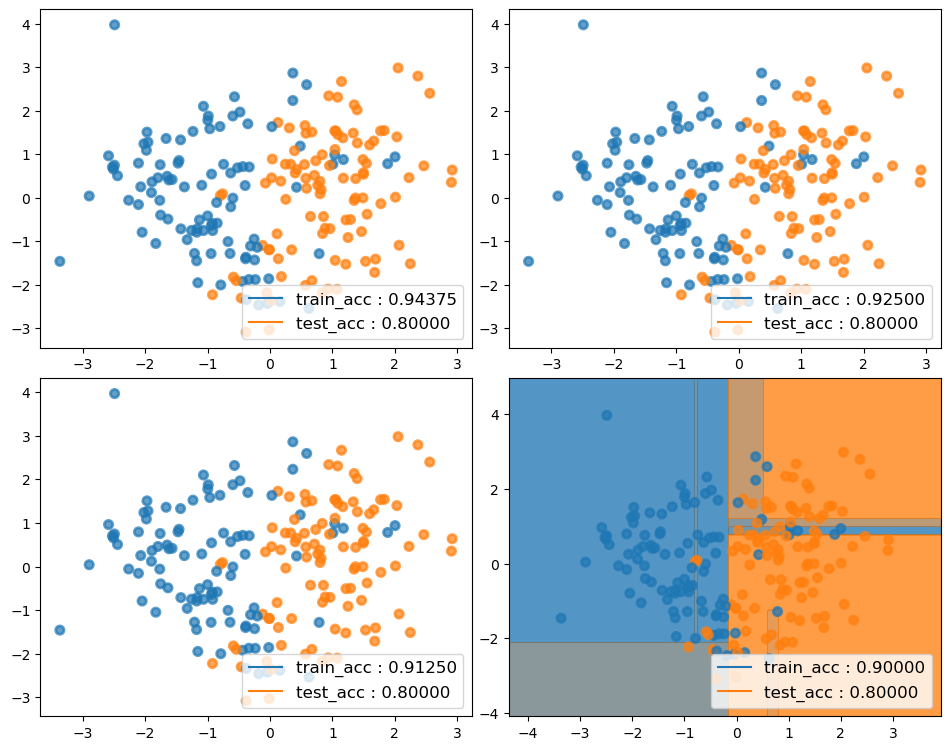

In [11]:
### Your code is here

for max_depth in max_depth_set:
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    
    for i, min_samples_leaf in enumerate(min_samples_leaf_set):

        dicision_tree_params = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

        model = dicision_tree_params.fit(X_train, y_train)

        predict_test = model.predict(X_test)
        predict_train = model.predict(X_train)

        accuracy_train = accuracy_score(y_train, predict_train)
        accuracy_test = accuracy_score(y_test, predict_test)

        print(f'max depth = {max_depth}, min samples leaf = {min_samples_leaf}, accuracy train = {accuracy_train}, accuracy test = {accuracy_test}')
        
        ax = axes[i // 2, i % 2]
        
        plot_surface_axes(model, X, y, ax, accuracy_train, accuracy_test)


__Задание 3.__

Добавим признак $2\cdot x_1 - x_2$, транформацию добавим как шаг пайплайна. С помощью данного класса (из практики/лекции) обучите дерево с максимальной глубиной=3, нарисуйте поверхность на трейне, посчитайте accuracy (2 б)

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print("Инициализировали класс!")
        
    def fit(self, X, y=None):
        print("Зафитили датасет!")
        return self
    
    def transform(self, X, y=None):
        
        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)
        
        print("Трансформировали датасет!")
        return X_

In [21]:
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

In [22]:
from sklearn.pipeline import Pipeline


pipe = Pipeline([
    ('custom_transformer', CustomFunctionTransformer('x1', 'x2', 
                                                    lambda x1, x2 : 2*x1 - x2)),
     ('dicision_tree', DecisionTreeClassifier(max_depth=3))
])

pipe.fit(X_train, y_train)

prediction_train = pipe.predict(X_train)
prediction_test = pipe.predict(X_test)

accuracy_train = accuracy_score(y_train, prediction_train)
accuracy_test = accuracy_score(y_test, prediction_test)

print(f'accuracy train = {accuracy_train:.2f}, accuracy test = {accuracy_test:.2f}')

Инициализировали класс!
Зафитили датасет!
Трансформировали датасет!
Трансформировали датасет!
Трансформировали датасет!
accuracy train = 0.86, accuracy test = 0.75


Трансформировали датасет!


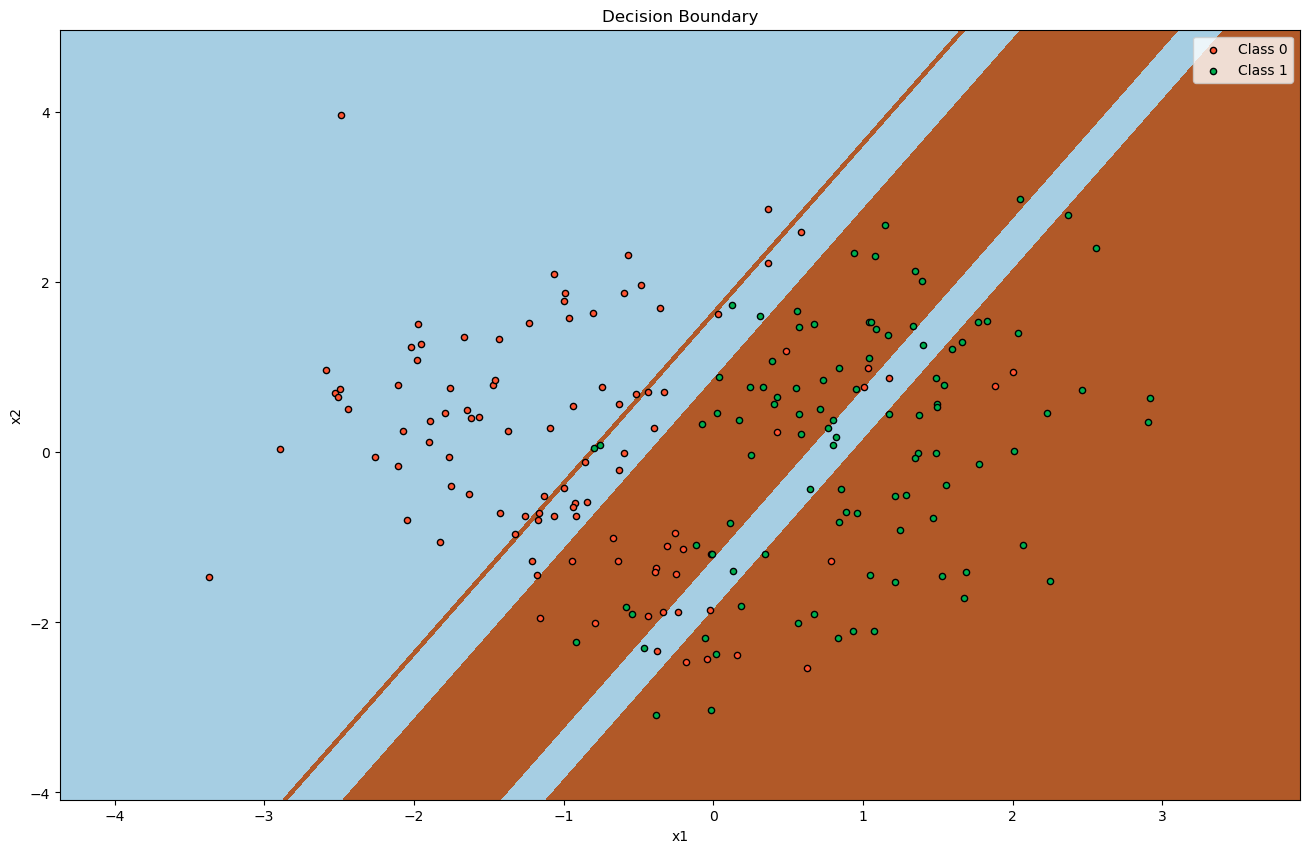

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Создание фигуры
fig = plt.figure()
fig.set_size_inches(16, 10)

# Вычислим границы признакового пространства
pixel_step = 0.001

# Проверка типа X_train, чтобы избежать ошибок
if isinstance(X_train, pd.DataFrame):
    x1_min, x1_max = X_train.values[:, 0].min() - 1, X_train.values[:, 0].max() + 1
    x2_min, x2_max = X_train.values[:, 1].min() - 1, X_train.values[:, 1].max() + 1
else:
    x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# Генерация точек на плоскости
xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

# Для каждой точки даем прогноз
Z = pipe.predict(pd.DataFrame(np.c_[xx1.ravel(), xx2.ravel()],
                              columns=["x1", "x2"]))
Z = Z.reshape(xx1.shape)

# Заполнение пространства
cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

plt.axis("tight")

# Рисуем точки и области
for i, n, c in zip(range(2), pipe.classes_, ["#FF5533", "#00B050"]):
    idx = np.where(y == i)
    if isinstance(X, pd.DataFrame):
        plt.scatter(
            X.values[idx, 0],  # для DataFrame
            X.values[idx, 1],
            c=c,
            s=20,
            edgecolor="k",
            label="Class %s" % n,
        )
    else:
        plt.scatter(
            X[idx, 0],  # для numpy
            X[idx, 1],
            c=c,
            s=20,
            edgecolor="k",
            label="Class %s" % n,
        )

# Настройка ограничений и меток
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc="upper right")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary")

plt.show()
